In [1]:
# imports
from sklearn.preprocessing import StandardScaler
from si.io.csv import read_csv
from si.feature_extraction.k_mer import KMer
from si.model_selection.split import train_test_split
from si.linear_module.logistic_regression import LogisticRegression

# KMer test for nucleotidic composition

In [2]:
tfbs_path = r"C:\Users\anaca\Documents\GitHub\SIB-ML-Portfolio\datasets\tfbs.csv"
tfbs = read_csv(tfbs_path, features=True, label=True)
#tfbs.print_dataframe()

In [3]:
k_mer = KMer(k=3, alphabet='dna')
kmer_dataset = k_mer.fit_transform(tfbs)

In [4]:
kmer_dataset.print_dataframe()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,0.00,0.02,0.02,0.00,0.02,0.04,0.00,0.00,0.02,0.00,...,0.02,0.02,0.00,0.00,0.06,0.00,0.02,0.02,0.02,0.02
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,...,0.04,0.00,0.00,0.00,0.04,0.06,0.02,0.00,0.06,0.10
0,0.04,0.04,0.00,0.00,0.06,0.00,0.00,0.00,0.02,0.06,...,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.02,0.00,0.00,0.00,0.10,0.02,0.02,0.04,0.02,...,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00
1,0.00,0.08,0.00,0.00,0.00,0.04,0.00,0.06,0.04,0.00,...,0.00,0.00,0.00,0.02,0.06,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,...,0.06,0.00,0.02,0.02,0.00,0.02,0.02,0.00,0.00,0.02
1,0.00,0.02,0.00,0.02,0.00,0.02,0.00,0.04,0.00,0.02,...,0.04,0.02,0.04,0.00,0.00,0.04,0.00,0.02,0.06,0.02
0,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.04,0.00,0.00,...,0.04,0.02,0.02,0.00,0.00,0.02,0.02,0.04,0.00,0.06
1,0.02,0.02,0.02,0.02,0.00,0.04,0.00,0.02,0.00,0.00,...,0.00,0.00,0.02,0.02,0.00,0.00,0.04,0.02,0.02,0.02


In [8]:
kmer_dataset.x = StandardScaler().fit_transform(kmer_dataset.x)

In [9]:
train, test = train_test_split(kmer_dataset)

In [12]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(train)

In [13]:
lg_model.score(test)

0.9466666666666667

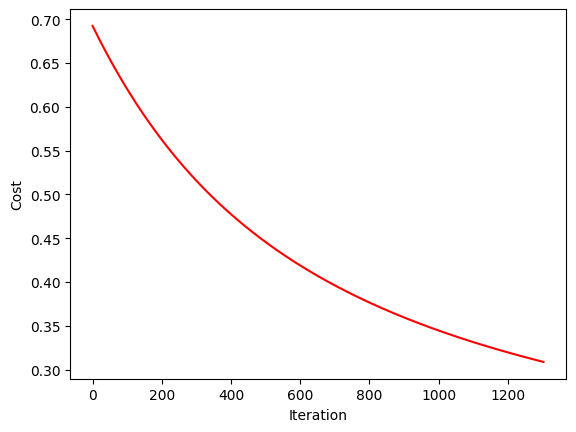

In [14]:
lg_model.cost_function_plot()

# KMer test for peptidic composition

In [4]:
transporter_path = r"C:\Users\anaca\Documents\GitHub\SIB-ML-Portfolio\datasets\transporters.csv"
transporter_df = read_csv(transporter_path, features=True, label=True)
#transporter_df.print_dataframe()

In [5]:
k_mer_pep = KMer(k=3, alphabet='peptide')
kmer_pep_dataset = k_mer_pep.fit_transform(transporter_df)

In [6]:
kmer_pep_dataset.print_dataframe()

,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
1,0.002967,0.000000,0.002967,0.002967,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0,0.000000,0.002522,0.000000,0.002522,0.000000,0.001261,0.0,0.000000,0.000000,0.002522,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.002299,0.000000,...,0.0,0.0,0.0,0.002299,0.0,0.0,0.0,0.0,0.0,0.0
0,0.006085,0.000000,0.002028,0.004057,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
0,0.004367,0.000000,0.000000,0.000000,0.001456,0.000000,0.0,0.001456,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001770,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.001996,0.000000,0.001996,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
kmer_pep_dataset.x(

0.5679964329913086

In [7]:
kmer_pep_dataset.x = StandardScaler().fit_transform(kmer_pep_dataset.x)

In [8]:
train_pep, test_pep = train_test_split(kmer_pep_dataset)

In [9]:
lg_pep_model = LogisticRegression(max_iter=2000)
lg_pep_model.fit(train_pep)

In [10]:
lg_pep_model.score(test_pep)

0.7910447761194029

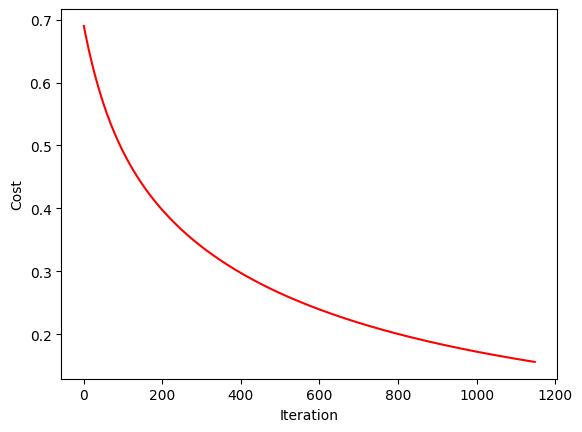

In [11]:
lg_pep_model.cost_function_plot()